# Dummy Movie Review Dataset to demonstrate main NLP concepts to get you started with text analysis using Python

In [18]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [19]:
#reading in the data

movie_df = pd.read_csv('movies.csv')

In [20]:
movie_df

,id,movie,review,Unnamed: 3,Unnamed: 4
0,1,Alive in Wonderland,Tim Burton’s“Alice in Wonderland” was probably...,NaN,NaN
1,2,A Beautifil Mind,Beautiful Mind is a biographical movie about J...,"Such movies, telling us about the life of a fa...",NaN
2,3,Wanted,The well-known Universal Studios film company ...,The atmosphere of comics entirely suited to th...,NaN
3,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,"Entangled evidence, amazing deduction of Holme...",The plot is as follows: Holmes (Robert Downey ...
4,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,"Entangled evidence, amazing deduction of Holme...",The plot is as follows: Holmes (Robert Downey ...
5,5,Kites,"“Kites” is not a traditional Indian movie, but...","This story is very exciting. Moreover, it is a...",NaN


Oh no - when copy-pasting the reviews into a csv file, single paragraphs in each review ended up in different columns. And it seems like we also have a duplicate.

## Removing Duplicates

In [21]:
#let's remove duplicates first

movie_df['dup'] = movie_df.duplicated(subset=None, keep='first')

In [22]:
movie_df.head()

,id,movie,review,Unnamed: 3,Unnamed: 4,dup
0,1,Alive in Wonderland,Tim Burton’s“Alice in Wonderland” was probably...,NaN,NaN,False
1,2,A Beautifil Mind,Beautiful Mind is a biographical movie about J...,"Such movies, telling us about the life of a fa...",NaN,False
2,3,Wanted,The well-known Universal Studios film company ...,The atmosphere of comics entirely suited to th...,NaN,False
3,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,"Entangled evidence, amazing deduction of Holme...",The plot is as follows: Holmes (Robert Downey ...,False
4,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,"Entangled evidence, amazing deduction of Holme...",The plot is as follows: Holmes (Robert Downey ...,True


We have created a new column that stores a boolean value whether the row is a duplicate row or not. We can see that for the second Sherlock Holmes the value in that column is True. We want to delete those rows where dup == True

In [23]:
movie_df = movie_df[movie_df['dup'] == False]

In [24]:
movie_df

,id,movie,review,Unnamed: 3,Unnamed: 4,dup
0,1,Alive in Wonderland,Tim Burton’s“Alice in Wonderland” was probably...,NaN,NaN,False
1,2,A Beautifil Mind,Beautiful Mind is a biographical movie about J...,"Such movies, telling us about the life of a fa...",NaN,False
2,3,Wanted,The well-known Universal Studios film company ...,The atmosphere of comics entirely suited to th...,NaN,False
3,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,"Entangled evidence, amazing deduction of Holme...",The plot is as follows: Holmes (Robert Downey ...,False
5,5,Kites,"“Kites” is not a traditional Indian movie, but...","This story is very exciting. Moreover, it is a...",NaN,False


In [25]:
del movie_df['dup'] # deleting "dup" column since we don't need it anymore

## Merging Columns

let's use the code we found on stackoverflow in order to merge the 3 review columns into one

In [26]:

movie_df['full_review'] = movie_df[movie_df.columns[2:]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)



### List slicing and lambda functions in python
Ok, a lot is going on in the function abovebut let's break it down
1. we are creating a new column (full_review) which will contain the whole review 
2. we select all columns starting from columns 2 (review) until the end. That's what [2:] is doing: starting from column 3 (column 0 being the first) and select all the columns until the end, hence no ending slice. 
3. we are applying a lambda function to selected cell (x). A lambda function is a small anonymous function and comes handy when we are doing an operation only once and do not need to define a separate function for it
4. the function iterates through each cell in the row starting at column 3 and joins it with the subsequent cells as a type string. If there cell is empty we ignore it (dropna()) otherwise we would have "na" added at the end of the review text. The reason why we are expresively defining that the cell should be of type string is because some entries might not have an incident text (all NANs) and would be picked up by python as a float type. 
5. the function goes through each row in the dataframe and does the merging described in 4.


In [27]:
movie_df.head()

,id,movie,review,Unnamed: 3,Unnamed: 4,full_review
0,1,Alive in Wonderland,Tim Burton’s“Alice in Wonderland” was probably...,NaN,NaN,Tim Burton’s“Alice in Wonderland” was probably...
1,2,A Beautifil Mind,Beautiful Mind is a biographical movie about J...,"Such movies, telling us about the life of a fa...",NaN,Beautiful Mind is a biographical movie about J...
2,3,Wanted,The well-known Universal Studios film company ...,The atmosphere of comics entirely suited to th...,NaN,The well-known Universal Studios film company ...
3,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,"Entangled evidence, amazing deduction of Holme...",The plot is as follows: Holmes (Robert Downey ...,Robert Downey Jr. and Jude Law tried to embody...
5,5,Kites,"“Kites” is not a traditional Indian movie, but...","This story is very exciting. Moreover, it is a...",NaN,"“Kites” is not a traditional Indian movie, but..."


In [28]:
movie_df.iloc[3,5]

'Robert Downey Jr. and Jude Law tried to embody unforgettable images of Sherlock Holmes and Doctor Watson in this bold new film version. In G. Ritchie’s “Sherlock Holmes” the legendary detective shows not only his unmatched intelligence, but also considerable physical training as well. Entangled evidence, amazing deduction of Holmes and his lively mind combine into an exciting series of grueling events. The director Guy Ritchie represents a fascinating adaptation of one of the world’s best detectives. Meet the new Sherlock Holmes! The plot is as follows: Holmes (Robert Downey Jr.) is rather depressed because of the possibility of Watson’s (Jude Law) marriage. His mood is also compounded by the absence of interesting cases. Trying to relax, he invents a silencer, does not go out of his room, participates in fights without rules and plays violin.'

## Preprocessing

Great, it has worked. Let's delete the redundant columns and do some text preprocessing

In [29]:
cols = [2,3,4]  #column indexes we dont need
movie_df.drop(movie_df.columns[cols],axis=1,inplace=True)

In [30]:
movie_df

,id,movie,full_review
0,1,Alive in Wonderland,Tim Burton’s“Alice in Wonderland” was probably...
1,2,A Beautifil Mind,Beautiful Mind is a biographical movie about J...
2,3,Wanted,The well-known Universal Studios film company ...
3,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...
5,5,Kites,"“Kites” is not a traditional Indian movie, but..."


In [31]:
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
stop_words_file = 'SmartStoplist.txt'

stop_words = []

with open(stop_words_file, "r") as f:
    for line in f:
        stop_words.extend(line.split()) 
        
stop_words = stop_words  

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [44]:
test_sentence = "this is a sentence to demonstrate how the preprocessing function works...!"

preprocess(test_sentence)

'disappoint demonstr preprocess function work'

you can see that "sentence" was stemmed to "sentenc", all stop words and punctuation were removed.
Let's apply that function to the incident texts in our movies dataframe

In [33]:
movie_df['prep'] = movie_df['full_review'].apply(preprocess)  


In [34]:
movie_df.head()

,id,movie,full_review,prep
0,1,Alive in Wonderland,Tim Burton’s“Alice in Wonderland” was probably...,tim burton alic wonderland anticip movi year g...
1,2,A Beautifil Mind,Beautiful Mind is a biographical movie about J...,beauti mind biograph movi john forb nash junio...
2,3,Wanted,The well-known Universal Studios film company ...,univers studio film compani plan shoot movi wa...
3,4,Sherlock Holmes,Robert Downey Jr. and Jude Law tried to embody...,robert downey jr jude law embodi unforgett ima...
5,5,Kites,"“Kites” is not a traditional Indian movie, but...",kite tradit indian movi breath take action fil...


## Most Common Words
In order to get an idea about a dataset, it's useful to have a look at the most common words. Reading through all incident texts is cumbersome and inefficient. Let's extract the most common key words


In [35]:

from collections import Counter
Counter(" ".join(movie_df["prep"]).split()).most_common(10)

[('movi', 8),
 ('film', 8),
 ('holm', 5),
 ('hard', 4),
 ('alic', 3),
 ('stori', 3),
 ('life', 3),
 ('speak', 3),
 ('mind', 3),
 ('want', 3)]

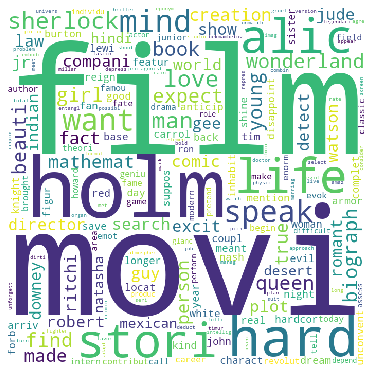

In [40]:
#nice library to produce wordclouds
from wordcloud import WordCloud

import matplotlib.pyplot as plt
# if uising a Jupyter notebook, include:
%matplotlib inline

all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in movie_df["prep"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [42]:
from nltk.util import ngrams
n_gram = 2
n_gram_dic = dict(Counter(ngrams(all_words.split(), n_gram)))

for i in n_gram_dic:
    if n_gram_dic[i] >= 2:
        print(i, n_gram_dic[i])
    

('beauti', 'mind') 2
('robert', 'downey') 2
('downey', 'jr') 2
('jude', 'law') 2
('sherlock', 'holm') 3
('love', 'stori') 2


## That's it (for now)

Given it's only 5 movie reviews there is of course not much else interesting to do with the tools we have covered in the medium article. However, I hope I have covered enough to get you started. Feel free to check out the US Railroad incident notebook in the same github repository as this one. Feel free to copy the preprocessing function and re-use it and any other code you might find useful